In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
palette="pastel"
sns.set(rc={'figure.figsize':(7, 5)})

In [221]:
df = pd.read_csv('AB_Test_Results.csv')

In [222]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [223]:
print(f'Shape of DataFrame: {df.shape}')

Shape of DataFrame: (10000, 3)


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [225]:
df.isnull().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [226]:
df.duplicated().sum()

2067

In [227]:
df.REVENUE = df.REVENUE.astype('int')

In [228]:
df = df.drop_duplicates()

In [229]:
df.groupby([df.VARIANT_NAME]).agg({'REVENUE': 'sum', 'VARIANT_NAME': 'count'})

,REVENUE,VARIANT_NAME
VARIANT_NAME,,
control,609,3968
variant,321,3958


In [230]:
data = [3968, 3958]
labels = ['control', 'variant']
colors = sns.color_palette('bright')[ 0:5]

([<matplotlib.patches.Wedge at 0x28c4f5d80>,
 [Text(-0.0021800788859088877, 1.09999783965972, 'control'),
  Text(0.0021801818751389485, -1.0999978394556016, 'variant')],
 [Text(-0.001189133937768484, 0.5999988216325746, '50%'),
  Text(0.0011891901137121538, -0.5999988215212372, '50%')])

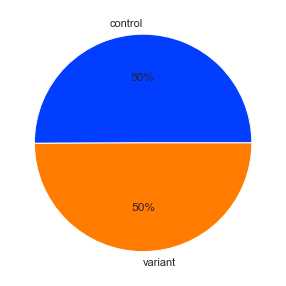

In [231]:
plt.pie(data, labels = labels, colors=colors, autopct='%.0f%%')

H0: there is no difference in mean between groups by group

H1: there is difference in mean between groups by group

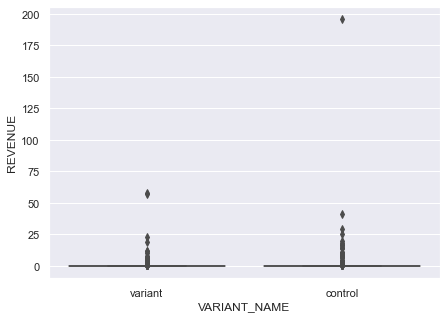

In [232]:
sns.boxplot(x = "VARIANT_NAME", y = "REVENUE", data = df);

In [233]:
df[df.REVENUE > 150]

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196


In [234]:
df = df[df.REVENUE < 150]

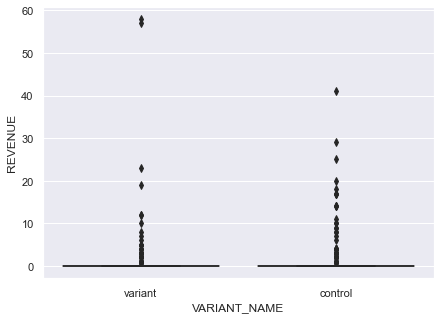

In [235]:
sns.boxplot(x = "VARIANT_NAME", y = "REVENUE", palette='dark', data = df);

In [237]:
df_control = df[df.VARIANT_NAME == 'control']
df_control[df.REVENUE > 0].count()

/var/folders/fg/cqky7zt5763738spc5v523xw0000gn/T/ipykernel_2594/1609546194.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_control[df.REVENUE > 0].count()


USER_ID         70
VARIANT_NAME    70
REVENUE         70
dtype: int64

In [238]:
df_variant = df[df.VARIANT_NAME == 'variant']
df_variant[df.REVENUE > 0].count()

/var/folders/fg/cqky7zt5763738spc5v523xw0000gn/T/ipykernel_2594/3029805237.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_variant[df.REVENUE > 0].count()


USER_ID         61
VARIANT_NAME    61
REVENUE         61
dtype: int64

In [239]:
df.groupby([df.VARIANT_NAME]).agg({'REVENUE': 'sum', 'VARIANT_NAME': 'count'})

,REVENUE,VARIANT_NAME
VARIANT_NAME,,
control,413,3967
variant,321,3958


In [240]:
ab_info = [[70, 61], [3967, 3958]]
stat, p, dof, expected = stats.chi2_contingency(ab_info)
prob = 0.95
alpha = 0.05

In [241]:
from scipy.stats import mannwhitneyu

In [242]:
test_stat, p_value = mannwhitneyu(df.loc[df["VARIANT_NAME"] == "control", "REVENUE"],
                                 df.loc[df["VARIANT_NAME"] == "variant", "REVENUE"])
print(" p_value is : " + str(p_value))
if p_value <= alpha:
    print(' Accept Null H0')
else:
    print(' Reject Null H0')

 p_value is : 0.42718439326480373
 Reject Null H0


In [243]:
odd_ratio, p_value = stats.fisher_exact(ab_info)
print(" p_value is : " + str(p_value))
if p_value <= alpha:
    print(' Accept Null H0')
else:
    print(' Reject Null H0')

 p_value is : 0.48127171075637964
 Reject Null H0


In [244]:
print(f' p_value: {p}\n degree of free: {dof}\n stat: {stat}\n')
if p <= alpha:
    print(' Accept Null H0')
else:
    print(' Reject Null H0')

 p_value: 0.4971795093504555
 degree of free: 1
 stat: 0.46095174538363215

 Reject Null H0


I took data from Kaggle pro ab testing. Conducted an exploratory analysis of the data, and then filtered the data, then made 2 hypotheses and conducted statistical tests. Based on the test results, I can conclude that there is a difference between the control and the variant. I would leave the control group because it performed better than the variant